# Анализ A/B теста для выбора маркетинговой стратегии

## Введение

Данный проект посвящен анализу результатов A/B тестирования трех различных маркетинговых промо-кампаний для нового продукта в сети быстрого питания. Тестирование проводилось в течение четырех недель в случайно выбранных локациях

Основная цель исследования - определить, какая из трех промо-акций наиболее эффективно стимулирует продажи нового продукта. Анализ основан на данных о еженедельных продажах в тысячах единиц для каждого сочетания локации, промо-акции и недели проведения теста

Датасет содержит информацию о 548 наблюдениях со следующими признаками:
- **MarketID** - идентификатор рынка
- **MarketSize** - размер рынка
- **LocationID** - идентификатор локации
- **AgeOfStore** - возраст магазина в годах
- **Promotion** - тип промо-акции
- **week** - неделя проведения теста
- **SalesInThousands** - объем продаж в тысячах

**Источник данных:** [Fast Food Marketing Campaign A/B Test](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test) с платформы Kaggle

Для достижения поставленной цели будут применены статистические методы анализа и проверки гипотез с целью обоснованного выбора оптимальной маркетинговой стратегии

## Первичный осмотр данных

In [5]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('WA_Marketing-Campaign.csv')

df.tail()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29
547,10,Large,920,14,2,4,49.41


In [7]:
df.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

Пропусков в данных нет

In [9]:
df.duplicated().sum()

np.int64(0)

Дублированных данных нет

In [11]:
df.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


In [12]:
df['Promotion'].value_counts()

Promotion
3    188
2    188
1    172
Name: count, dtype: int64

Небольшой дисбаланс в размерах групп (~10% разницы) не должен существенно повлиять на результаты A/B теста

## Разведотельный анализ (EDA)

### Анализ распределения продаж по промо-акциям

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Статистика продаж по промо-акциям:


,mean,median,std,count
Promotion,,,,
1,58.099012,55.385,16.553782,172
2,47.329415,45.385,15.108955,188
3,55.364468,51.165,16.766231,188


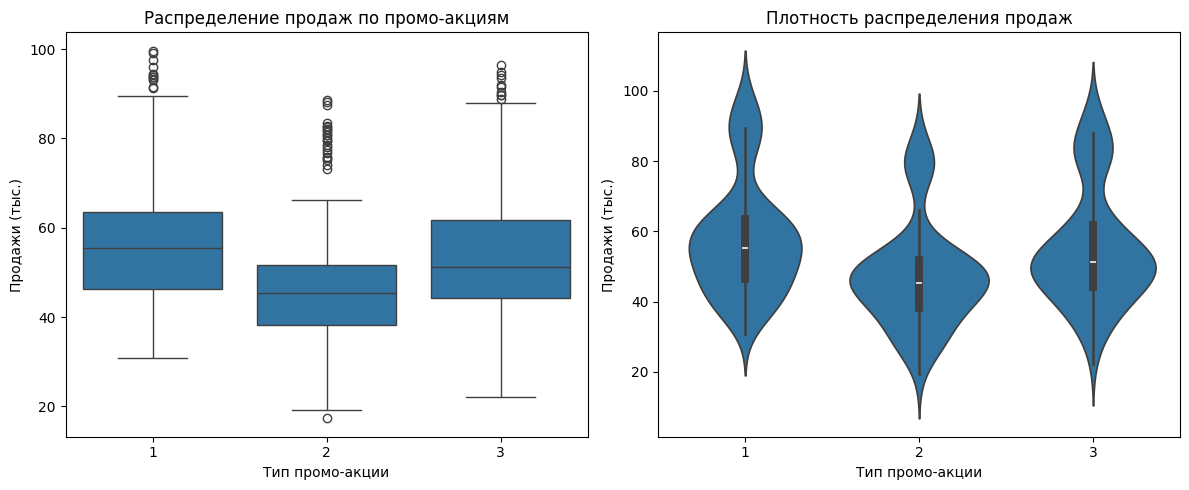

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Promotion', y='SalesInThousands')
plt.title('Распределение продаж по промо-акциям')
plt.xlabel('Тип промо-акции')
plt.ylabel('Продажи (тыс.)')

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Promotion', y='SalesInThousands')
plt.title('Плотность распределения продаж')
plt.xlabel('Тип промо-акции')
plt.ylabel('Продажи (тыс.)')

plt.tight_layout()

print("Статистика продаж по промо-акциям:")
promotion_stats = df.groupby('Promotion')['SalesInThousands'].agg(['mean', 'median', 'std', 'count'])
promotion_stats

- **Promotion 1**: Наиболее эффективная акция с самыми высокими средними продажами и медианой
- **Promotion 2**: Наименее успешная акция со значительно более низкими показателями продаж
- **Promotion 3**: Промежуточный результат, близкий к акции 1 по среднему, но с более низкой медианой

### Влияние размера рынка на продажи

Статистика по размерам рынка:


,mean,std,count
MarketSize,,,
Large,70.116726,17.052156,168
Medium,43.985344,9.051378,320
Small,57.409333,6.633101,60


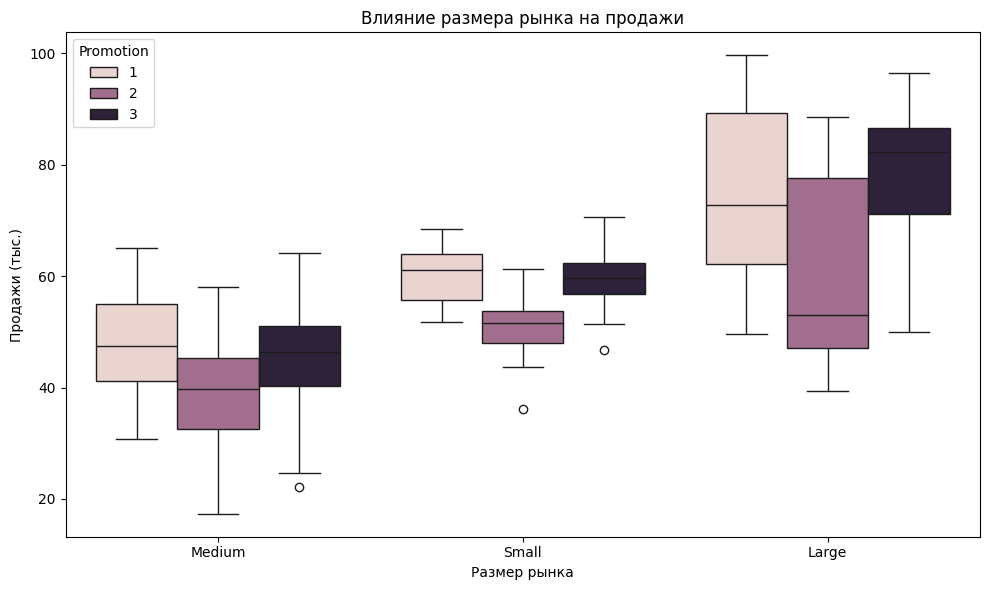

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='MarketSize', y='SalesInThousands', hue='Promotion')
plt.title('Влияние размера рынка на продажи')
plt.xlabel('Размер рынка')
plt.ylabel('Продажи (тыс.)')
plt.legend(title='Promotion')
plt.tight_layout()

print("Статистика по размерам рынка:")
market_stats = df.groupby('MarketSize')['SalesInThousands'].agg(['mean', 'std', 'count'])
market_stats

- **Large** Показывает наибольший разброс в продажах, но и самые высокие средние значения
- **Medium**: Демонстрирует самые низкие и стабильные показатели продаж среди всех размеров
- **Small**: Имеет высокие и самые предсказуемые (стабильные) продажи

### Зависимость продаж от возраста магазина

Корреляция возраста магазина с продажами:
Коэффициент корреляции: -0.029


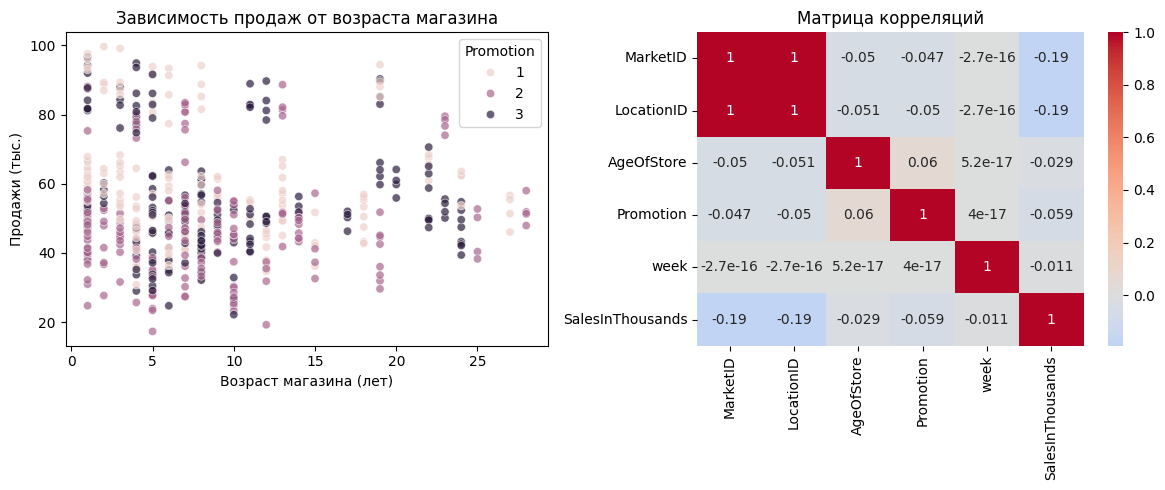

In [23]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='AgeOfStore', y='SalesInThousands', hue='Promotion', alpha=0.7)
plt.title('Зависимость продаж от возраста магазина')
plt.xlabel('Возраст магазина (лет)')
plt.ylabel('Продажи (тыс.)')

plt.subplot(1, 2, 2)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')

plt.tight_layout()

print("Корреляция возраста магазина с продажами:")
age_corr = df['AgeOfStore'].corr(df['SalesInThousands'])
print(f"Коэффициент корреляции: {age_corr:.3f}")

Возраст магазина не влияет на объем продаж

### Динамика продаж по неделям

Статистика продаж по неделям:


,mean,std
week,,
1,53.790584,16.969321
2,53.386569,16.121453
3,53.474599,17.045633
4,53.213066,17.045588


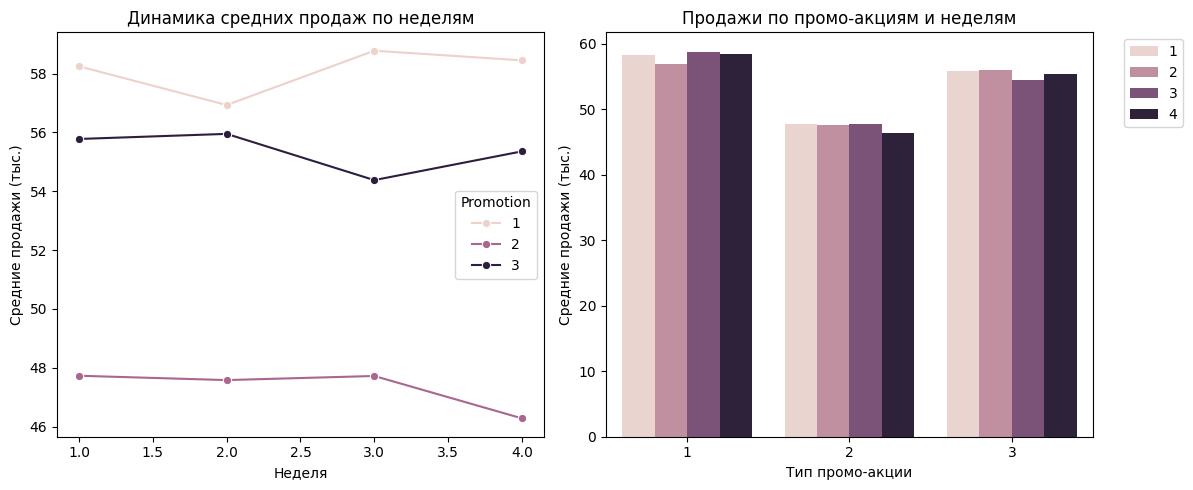

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
weekly_sales = df.groupby(['week', 'Promotion'])['SalesInThousands'].mean().reset_index()
sns.lineplot(data=weekly_sales, x='week', y='SalesInThousands', hue='Promotion', marker='o')
plt.title('Динамика средних продаж по неделям')
plt.xlabel('Неделя')
plt.ylabel('Средние продажи (тыс.)')

plt.subplot(1, 2, 2)
ax = sns.barplot(data=df, x='Promotion', y='SalesInThousands', hue='week', errorbar=None)
plt.title('Продажи по промо-акциям и неделям')
plt.xlabel('Тип промо-акции')
plt.ylabel('Средние продажи (тыс.)')
# Перемещение легенды за пределы графика
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

print("Статистика продаж по неделям:")
week_stats = df.groupby('week')['SalesInThousands'].agg(['mean', 'std'])
week_stats

**Week** демонстрируют удивительно стабильные показатели продаж без значительных колебаний

## Статистический анализ

### Проверка нормальности распределения продаж

**Тест Шапиро-Уилка**:

$W = (\sum_i a_i x_i)^2 / (\sum_i x_i - \bar{x})^2$

$W \in [0, 1]$

$W = 1$: идеальное соответствие нормальному распределению

$W = 0$: сильное отклонение от нормальности

$W$ - это мера "прямолинейности" Q-Q plot: чем ближе к 1, тем прямее линия на графике.

Тесты на нормальность распределения продаж:
Shapiro-Wilk test: p-value = 0.0000
Normaltest: p-value = 0.0000


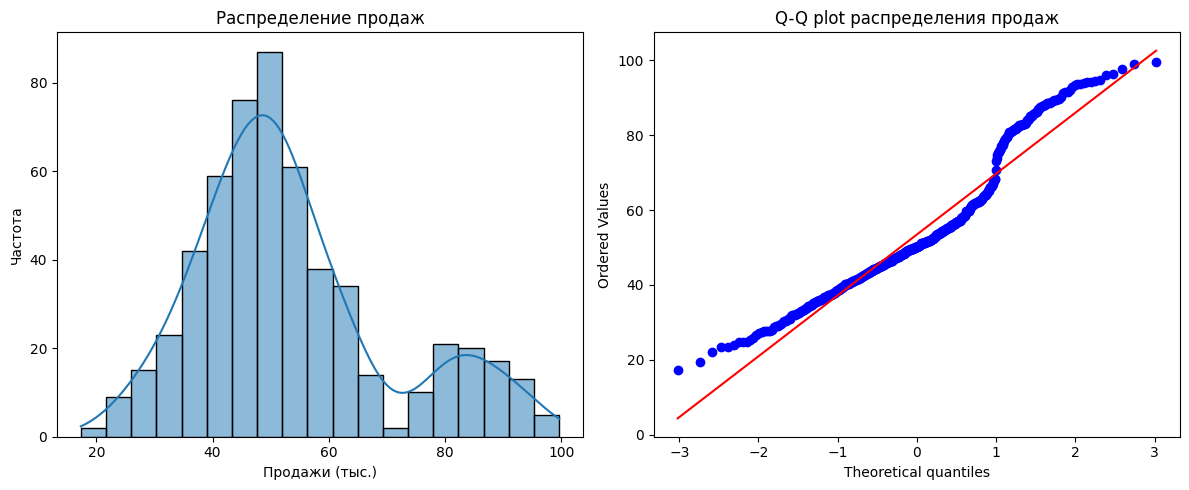

In [31]:
import scipy.stats as stats
from scipy.stats import shapiro, normaltest

plt.figure(figsize=(12, 5))

# Гистограмма с кривой нормального распределения
plt.subplot(1, 2, 1)
sns.histplot(df['SalesInThousands'], kde=True)
plt.title('Распределение продаж')
plt.xlabel('Продажи (тыс.)')
plt.ylabel('Частота')

# Q-Q plot для визуальной проверки нормальности
plt.subplot(1, 2, 2)
stats.probplot(df['SalesInThousands'], dist="norm", plot=plt)
plt.title('Q-Q plot распределения продаж')

plt.tight_layout()

# Статистические тесты на нормальность
shapiro_stat, shapiro_p = shapiro(df['SalesInThousands'])
normaltest_stat, normaltest_p = normaltest(df['SalesInThousands'])

print("Тесты на нормальность распределения продаж:")
print(f"Shapiro-Wilk test: p-value = {shapiro_p:.4f}")
print(f"Normaltest: p-value = {normaltest_p:.4f}")

### Сравнение средних продаж по промо-акциям

Сравнение продаж по промо-акциям:


,mean,std,count
Promotion,,,
1,58.10,16.55,172
2,47.33,15.11,188
3,55.36,16.77,188


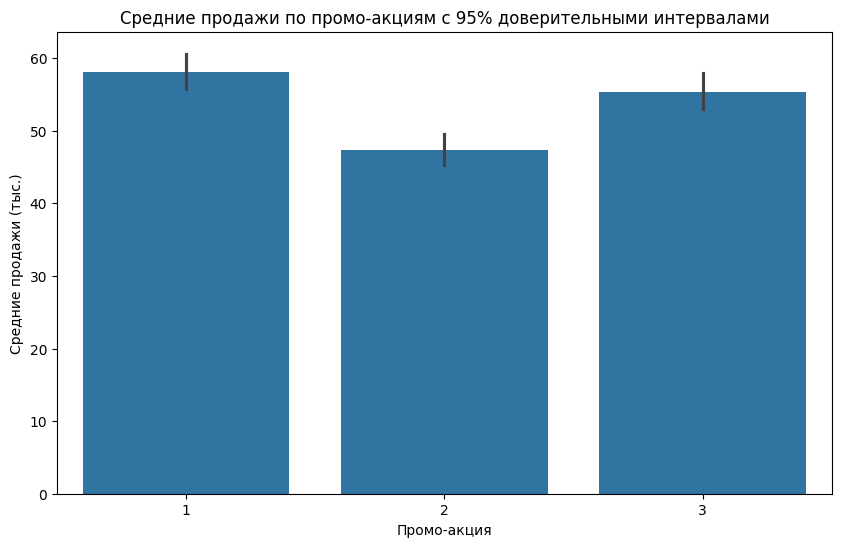

In [33]:
# Визуализация средних с доверительными интервалами
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Promotion', y='SalesInThousands', errorbar=('ci', 95))
plt.title('Средние продажи по промо-акциям с 95% доверительными интервалами')
plt.xlabel('Промо-акция')
plt.ylabel('Средние продажи (тыс.)')

promo_comparison = df.groupby('Promotion')['SalesInThousands'].agg(['mean', 'std', 'count']).round(2)
print("Сравнение продаж по промо-акциям:")
promo_comparison

### ANOVA тест для сравнения всех групп

Сравнение средних значений трех и более групп для выявления статистически значимых различий

Гипотизы:
- $H_0$ : $\mu_1 = \mu_2 = \cdots = \mu_n$ (все средние равны)
- $H_1$ : хотя бы одно среднее отличается

$F$ - статистика:

$F = \frac{MSB}{MSW} = \frac{SSB}{k-1} / \frac{SSW}{N-k}$

Где: 
- $k$ - кол-во групп
- $N$ - общее число наблюдений
- $MSB$ - межгрупповая дисперсия
- $MSW$ - внутригрупповая дисперсия
- $SSB$ - сумма квадратов между группами
- $SSW$ - сумма квадратов внутри групп

$F≈1$: Различия между группами сравнимы со случайными колебаниями внутри групп. Группы статистически не различаются

$F >> 1$: Межгрупповые различия значительно превышают случайную вариацию. Существуют статистически значимые различия между группами

Тест показывает, существуют ли статистически значимые различия между средними значениями групп.

In [36]:
from scipy.stats import f_oneway
groups = [df[df['Promotion'] == i]['SalesInThousands'] for i in [1, 2, 3]]
f_stat, p_value = f_oneway(*groups)

print("Результаты ANOVA теста:")
print(f"F-статистика: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print("Статистически значимые различия между промо-акциями обнаружены")
else:
    print("Статистически значимых различий между промо-акциями не обнаружено")

Результаты ANOVA теста:
F-статистика: 21.9535
p-value: 0.0000
Статистически значимые различия между промо-акциями обнаружены


### Попарное сравнение промо-акций (Tukey HSD)

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Детальное сравнение всех пар промо-акций
tukey_results = pairwise_tukeyhsd(endog=df['SalesInThousands'],
                                  groups=df['Promotion'],
                                  alpha=0.05)

print("Попарное сравнение промо-акций:")
print(tukey_results)

Попарное сравнение промо-акций:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2 -10.7696    0.0 -14.7738 -6.7654   True
     1      3  -2.7345 0.2444  -6.7388  1.2697  False
     2      3   8.0351    0.0   4.1208 11.9493   True
-----------------------------------------------------


- `Промо-акция 2` значительно эффективнее `промо-акции 1`
- `Промо-акция 3` значительно эффективнее `промо-акции 2`
- `Промо-акции 1 и 3` не имеют статистически значимых различий

# Вывод:
**Основная стратегия**: Внедрить `Promotion 1` как основную маркетинговую кампанию.

**Резервная стратегия**: Рассмотреть `Promotion 3` как альтернативу, если `Promotion 1` окажется значительно дороже в реализации

### Дополнительное исследование:

Рекомендую провести анализ стоимости проведения каждой акции. Если `Promotion 3` значительно дешевле, тогда может иметь смысл выбрать ее как более рентабельную при близких результатах.

### Итог: 
Выбирайте `Promotion 1` как наиболее эффективную акцию, но сохраняйте `Promotion 3` в качестве стратегического резерва